<a href="https://colab.research.google.com/github/pavithramalla/Wine-Quality-Check/blob/main/wine_quality_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
red=pd.read_csv('winequality-red.csv', sep=';')
white=pd.read_csv('winequality-white.csv', sep=';')

In [ ]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
red.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
white.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
red.shape

(1599, 12)

In [ ]:
white.shape

(4898, 12)

In [ ]:
red['type'] = 'red'
white['type'] = 'white'

In [ ]:
wine_data = pd.concat([red,white], ignore_index=True)

In [ ]:
wine_data.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
from sklearn.utils import shuffle
wine_data = shuffle(wine_data, random_state=42).reset_index(drop=True)

In [ ]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,label
0,8.0,0.71,0.00,2.6,0.080,11.0,34.0,0.9976,3.44,0.53,9.5,5,0,0
1,7.7,0.61,0.18,2.4,0.083,6.0,20.0,0.9963,3.29,0.60,10.2,6,0,0
2,6.3,0.29,0.29,3.3,0.037,32.0,140.0,0.9895,3.17,0.36,12.8,7,1,1
3,7.1,0.30,0.46,1.5,0.066,29.0,133.0,0.9906,3.12,0.54,12.7,6,1,0
4,6.5,0.08,0.33,1.9,0.028,23.0,93.0,0.9910,3.34,0.70,12.0,7,1,1


In [ ]:
wine_data.shape

(6497, 13)

In [ ]:
wine_data.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.17         0.74           12.80      0.045   
1               7.7              0.64         0.21            2.20      0.077   
2               6.8              0.39         0.34            7.40      0.020   
3               6.3              0.28         0.47           11.20      0.040   
4               7.4              0.35         0.20           13.90      0.054   
...             ...               ...          ...             ...        ...   
6492            7.6              0.32         0.58           16.75      0.050   
6493            5.6              0.28         0.27            3.90      0.043   
6494            6.4              0.37         0.20            5.60      0.117   
6495            6.5              0.26         0.50            8.00      0.051   
6496            7.2              0.62         0.06            2.70      0.077   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    24.0                 126.0  0.99420  3.26       0.38   
1                    32.0                 133.0  0.99560  3.27       0.45   
2                    38.0                 133.0  0.99212  3.18       0.44   
3                    61.0                 183.0  0.99592  3.12       0.51   
4                    63.0                 229.0  0.99888  3.11       0.50   
...                   ...                   ...      ...   ...        ...   
6492                 43.0                 163.0  0.99990  3.15       0.54   
6493                 52.0                 158.0  0.99202  3.35       0.44   
6494                 61.0                 183.0  0.99459  3.24       0.43   
6495                 46.0                 197.0  0.99536  3.18       0.47   
6496                 15.0                  85.0  0.99746  3.51       0.54   

      alcohol  quality   type  
0        12.2        8  white  
1         9.9        5    red  
2        12.0        7  white  
3         9.5        6  white  
4         8.9        6  white  
...       ...      ...    ...  
6492      9.2        5  white  
6493     10.7        7  white  
6494      9.5        5  white  
6495      9.5        5  white  
6496      9.5        5    red  

[6497 rows x 13 columns]>

In [ ]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [ ]:
wine_data.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [ ]:
unique_counts=wine_data.nunique()

In [ ]:
wine_data.nunique()

,0
fixed acidity,106
volatile acidity,187
citric acid,89
residual sugar,316
chlorides,214
free sulfur dioxide,135
total sulfur dioxide,276
density,998
pH,108
sulphates,111


In [ ]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white


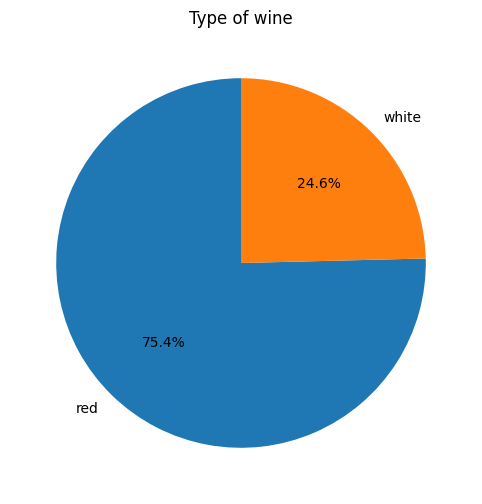

In [ ]:
 plt.figure(figsize=(10,6))
 plt.pie(wine_data['type'].value_counts(), labels=['red','white'], autopct='%1.1f%%', startangle=90)
 plt.title('Type of wine')
 plt.show()

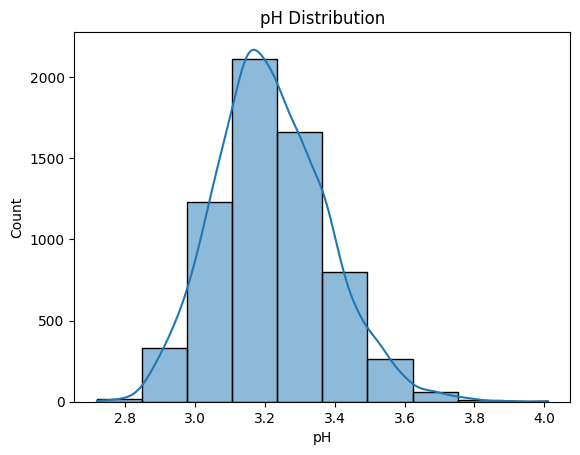

In [ ]:
sns.histplot(data=wine_data, x='pH',bins=10, kde=True)
plt.title('pH Distribution')
plt.show()

/tmp/ipython-input-25-2064973894.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'quality', data = wine_data, palette='Set1')


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '3'),
  Text(1, 0, '4'),
  Text(2, 0, '5'),
  Text(3, 0, '6'),
  Text(4, 0, '7'),
  Text(5, 0, '8'),
  Text(6, 0, '9')])

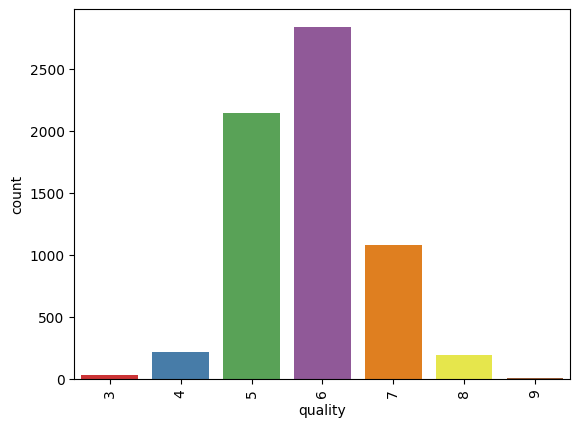

In [ ]:
sns.countplot(x = 'quality', data = wine_data, palette='Set1')
plt.xticks(rotation=90)

<Axes: xlabel='alcohol', ylabel='Count'>

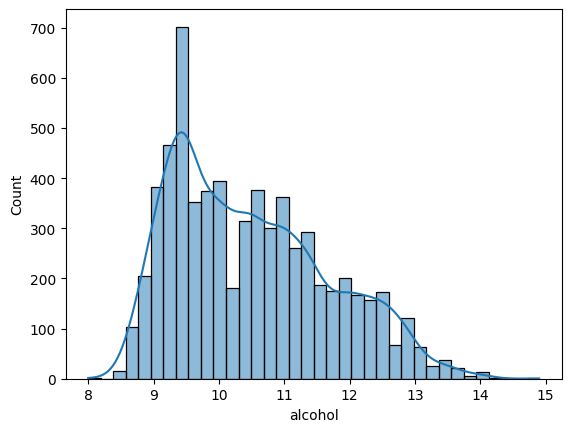

In [ ]:
sns.histplot(x = 'alcohol', data = wine_data,kde=True)

Text(0.5, 1.0, 'type vs quality')

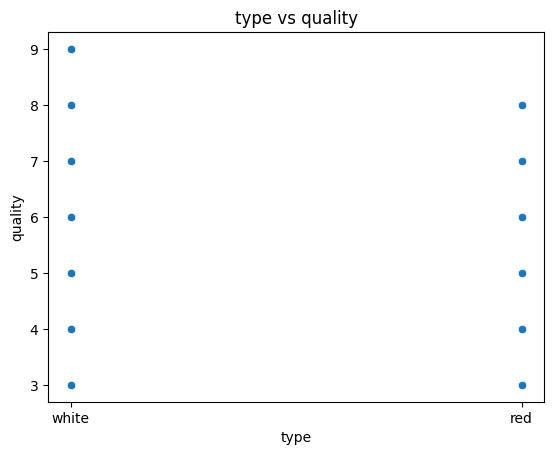

In [ ]:
sns.scatterplot(x = 'type', y='quality', data=wine_data)
plt.title('type vs quality')

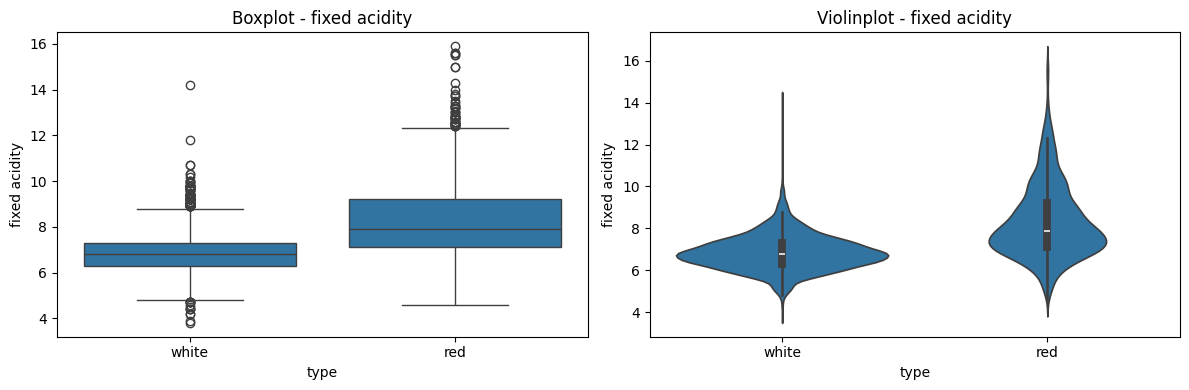

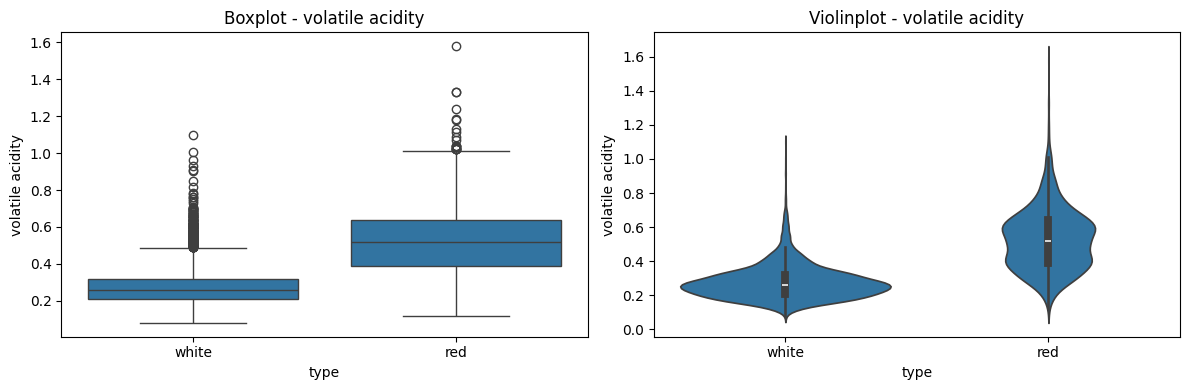

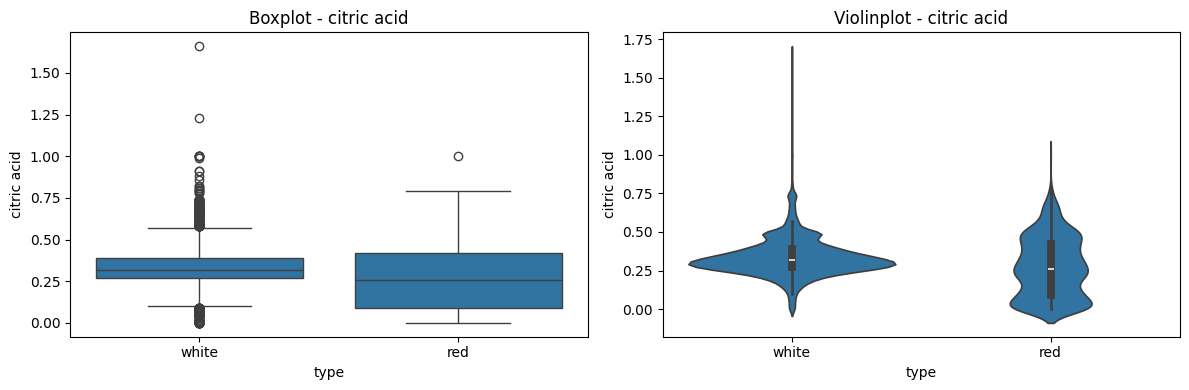

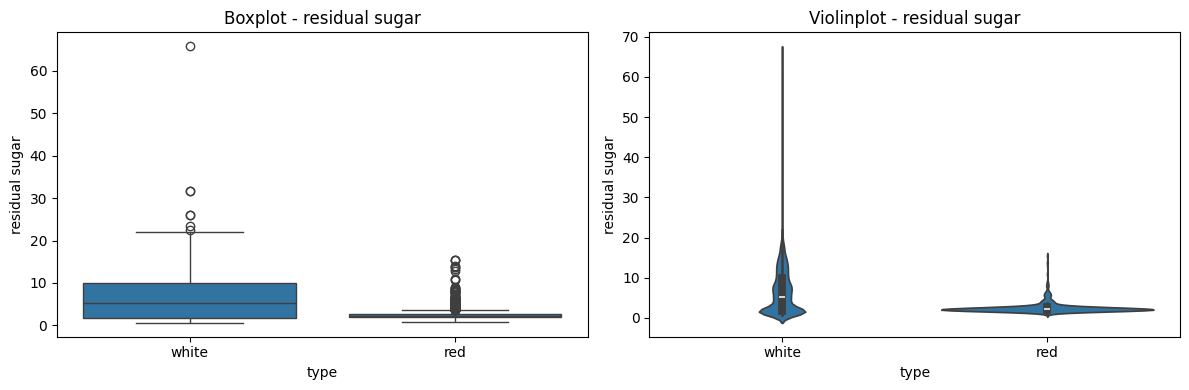

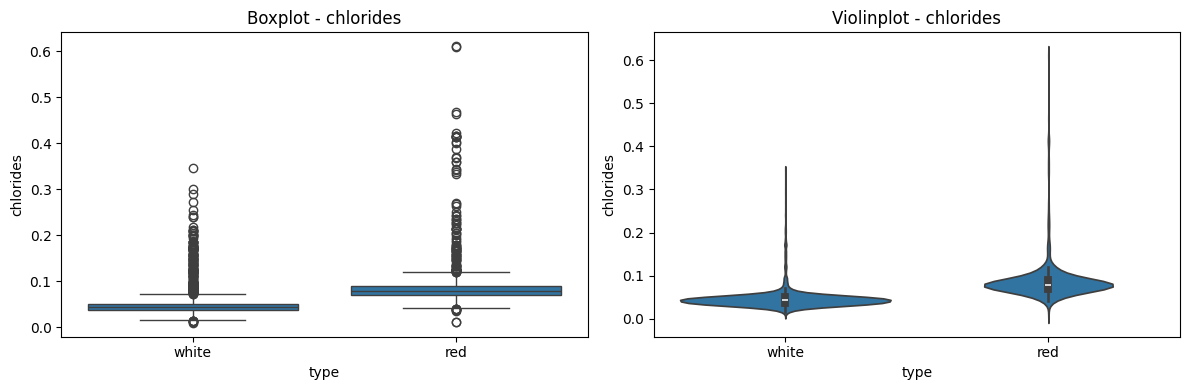

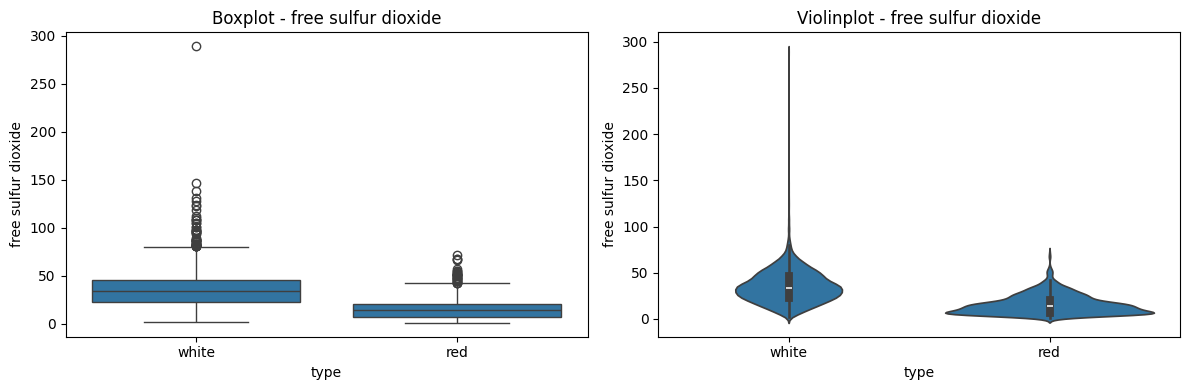

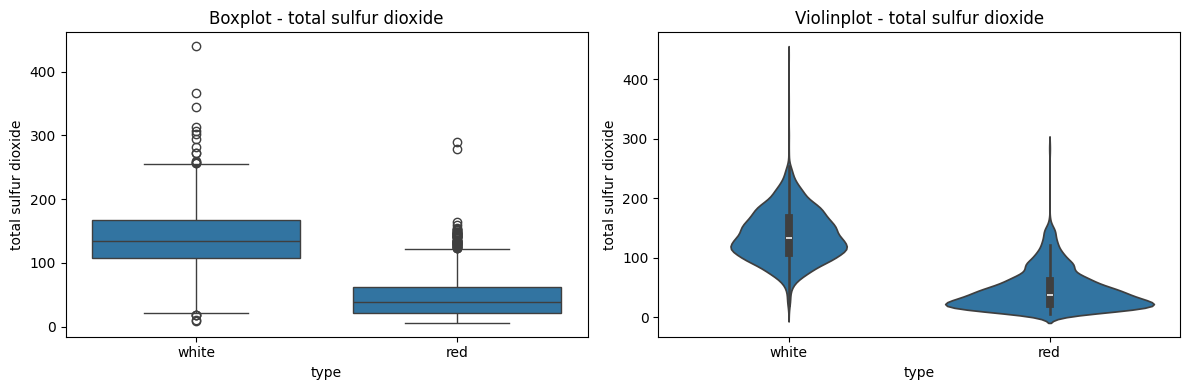

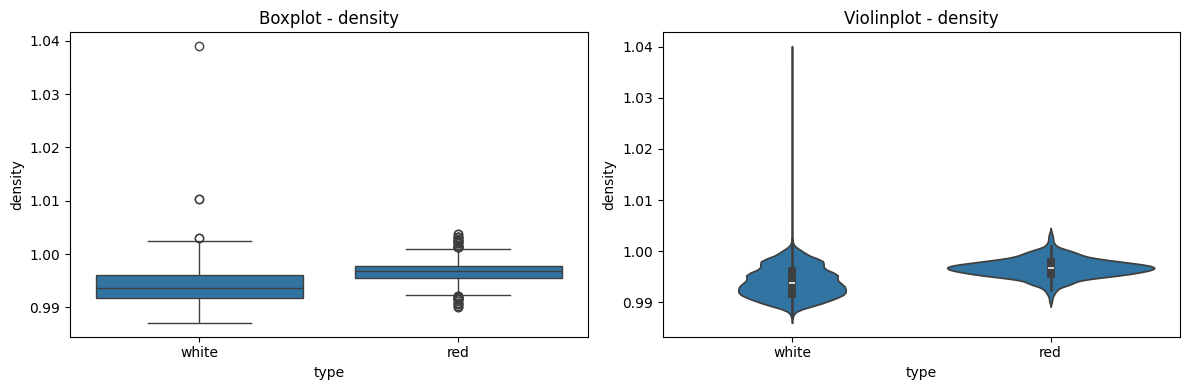

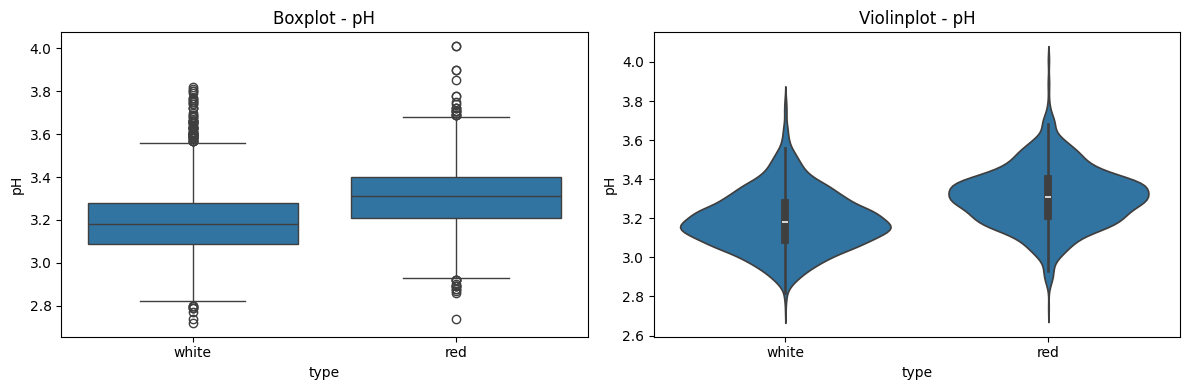

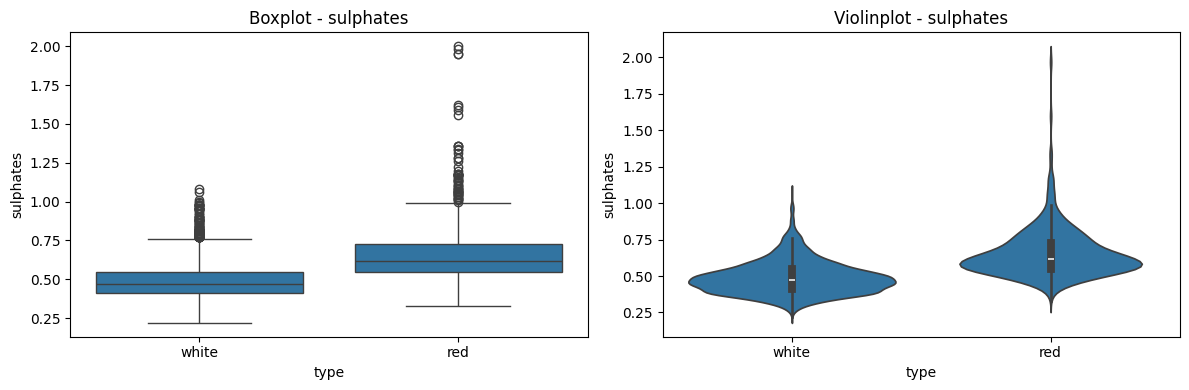

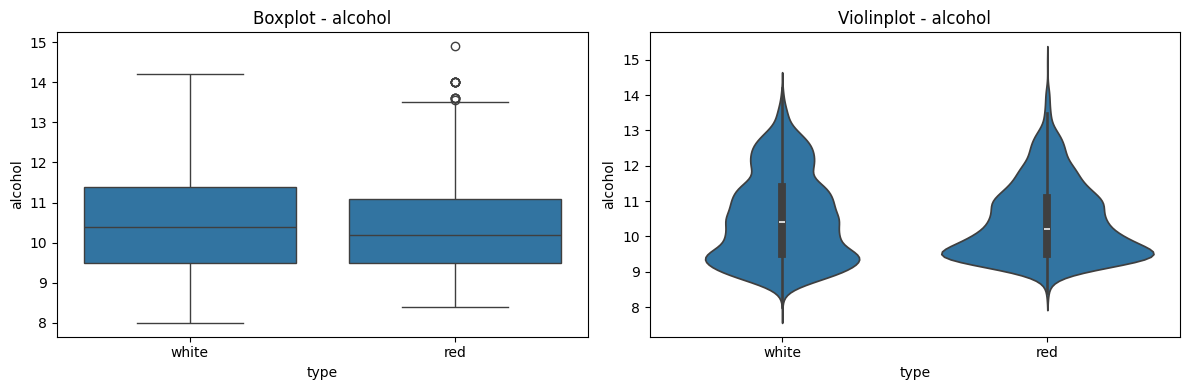

In [ ]:

for col in wine_data.columns[:-2]:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.boxplot(x='type', y=col, data=wine_data, ax=ax[0])
    sns.violinplot(x='type', y=col, data=wine_data, ax=ax[1])
    ax[0].set_title(f'Boxplot - {col}')
    ax[1].set_title(f'Violinplot - {col}')
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
wine_data['type'] = le.fit_transform(wine_data['type'])
print(wine_data['type'])

0       1
1       0
2       1
3       1
4       1
       ..
6492    1
6493    1
6494    1
6495    1
6496    0
Name: type, Length: 6497, dtype: int64


In [ ]:
wine_data['label'] = wine_data['quality'].apply(lambda x: 1 if x >= 6 else 0)
print(wine_data['label'].value_counts())

label
1    4113
0    2384
Name: count, dtype: int64


In [ ]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,1,1
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,0,0
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,1,1
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,1,1
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,1,1


<Axes: >

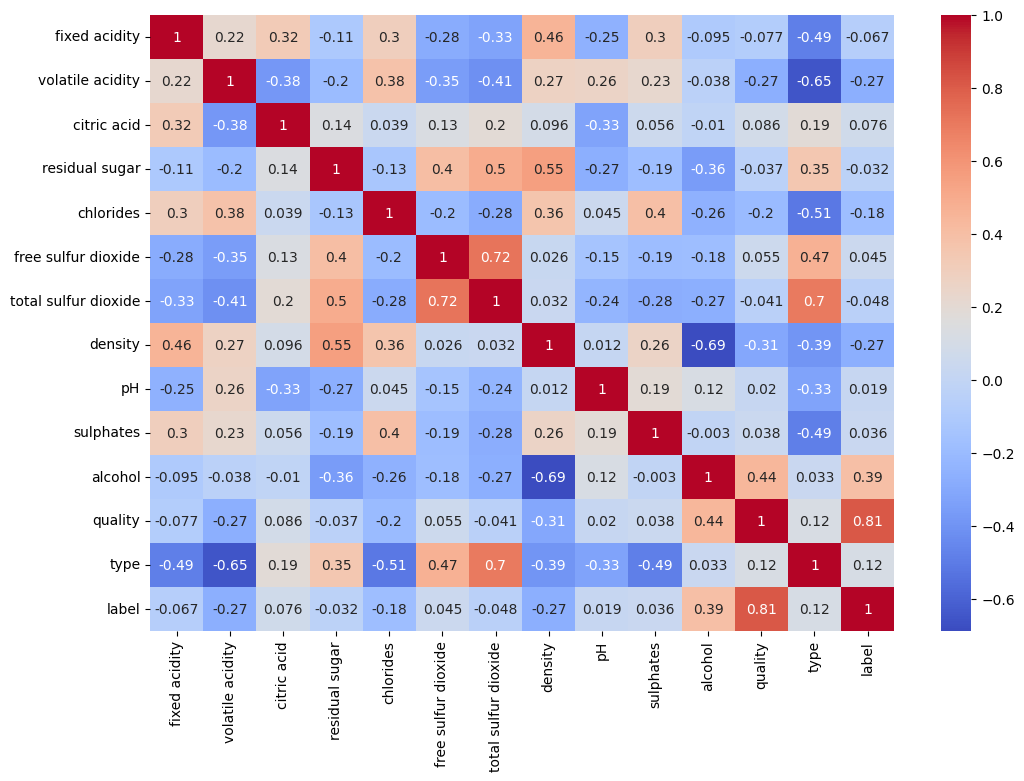

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(wine_data.corr(),annot=True, cmap='coolwarm')

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(wine_data, train_size = 0.75)

In [ ]:
x_test = test.drop(['quality', 'label', 'type'], axis=1)
y_test = test['label']

x_train = train.drop(['quality','label', 'type'],axis=1)
y_train = train['label']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline

In [ ]:
model = LogisticRegression(max_iter = 200, random_state=5)
model.fit(x_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, random_state=5)

In [ ]:
model.score(x_test, y_test)

0.7464615384615385

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)

[1 0 1 ... 0 0 1]


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[302, 274],
       [138, 911]])

Text(33.22222222222222, 0.5, 'real')

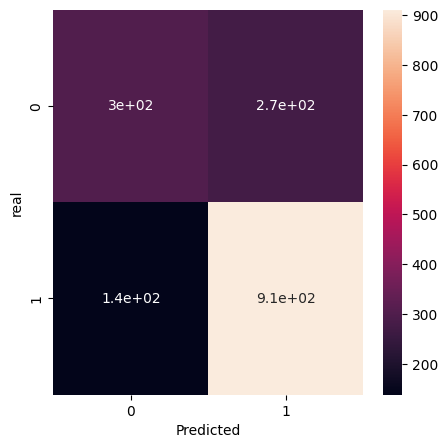

In [ ]:
plt.figure(figsize =(5,5))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('real')

In [ ]:
score = accuracy_score(y_test, y_pred)*100
acc = round(score, 2)
inac = round(100-acc,2)
corr = (score*len(test))/100
print('Accuracy: ',acc, '%, ', corr, 'correct detections')
print('Inaccuracy: ',inac, '%, ', len(test)-corr, 'Incorrect detections')

Accuracy:  74.65 %,  1213.0000000000002 correct detections
Inaccuracy:  25.35 %,  411.9999999999998 Incorrect detections


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

wine_data['label'] = wine_data['quality'].apply(lambda x: 1 if x >= 6 else 0)
print(wine_data['label'].value_counts())
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LogisticRegression(max_iter=300)
model.fit(x_train, y_train)

preds = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, preds))

label
1    4113
0    2384
Name: count, dtype: int64
Accuracy: 0.796923076923077


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

wine_data['label'] = wine_data['quality'].apply(lambda x: 1 if x >= 7 else 0)
print(wine_data['label'].value_counts())
x = wine_data.drop(['quality', 'label'], axis=1)
y = wine_data['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40, stratify=y)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

preds = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, preds))

label
0    5220
1    1277
Name: count, dtype: int64
Accuracy: 0.8884615384615384


In [ ]:
wine_data.loc[5]

,5
fixed acidity,7.20000
volatile acidity,0.53000
citric acid,0.14000
residual sugar,2.10000
chlorides,0.06400
free sulfur dioxide,15.00000
total sulfur dioxide,29.00000
density,0.99323
pH,3.35000
sulphates,0.61000


In [ ]:
input_data = (7.20000, 0.53000, 0.14000, 2.10000, 0.06400, 15.00000, 29.00000, 0.99323, 3.35000, 0.61000, 12.10000, 0.00000)

input_data_as_np_array = np.asarray(input_data)
input_data_reshaped = input_data_as_np_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)

if prediction <= 4:
    print("Bad Quality Wine")
elif prediction <= 6:
    print("Neutral Quality Wine")
else:
    print("Good Quality Wine")


Bad Quality Wine


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

In [ ]:
filename = 'wine.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
wine_data.to_csv('winequality.csv', index=False)
